# Deep Learning

## HW1- Problem 3 - Regression (100 pts)

### Please fill this part


1.   Full Name: Mahdi Koloushani
2.   Student Number: 401300066


*You are just allowded to change those parts that start with "TO DO". Please do not change other parts.*

*It is highly recommended to read each codeline carefully and try to understand what it exactly does. Best of luck and have fun!*

In [1]:
# You are not allowed to import other packages.

import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
from sklearn.metrics import mean_squared_error

### Part1:
Consider the dataset which has been given to you. Split the dataset into the `training dataset` and `test dataset`. You can use `80%` of the data for training and the rest for testing.

In [2]:
dataset = pd.read_csv("./data/data01.csv")

# implement the split part
# name them: x_train, x_test, y_train, y_test

#inds = np.arange(dataset.shape[0])
#np.random.shuffle(inds)
x_train = dataset.X[:int(dataset.shape[0]*0.8)].to_numpy().reshape(-1,1)
y_train = dataset.Y[:int(dataset.shape[0]*0.8)].to_numpy().reshape(-1,1)

x_test = dataset.X[int(dataset.shape[0]*0.8):].to_numpy()
y_test = dataset.Y[int(dataset.shape[0]*0.8):].to_numpy().reshape(-1,1)

### Part2:
Assume there is simple linear relationship between X and Y. Train a simple `Linear Regression` on the training dataset and report its accuracy on the training and testing dataset, separately.

In [3]:
# here you can implement via sgd or use least square solution. we suggest the second one inv(A^T A) * A^T y.
# consider m as the returned line --> m[0] = the slope , m[1] = y intercept, also don't forget to use numpy for calculating m.
A = np.hstack((x_train,np.ones((x_train.shape[0],1))))
m = np.dot(np.dot(np.linalg.inv(np.dot(A.T,A)),A.T),y_train)

In [4]:
predicted_train_y = m[0] * x_train + m[1]
predicted_test_y = m[0] * x_test + m[1]

train_error = np.linalg.norm(y_train-predicted_train_y)**2/len(y_train)
test_error = np.linalg.norm(y_test.reshape(1,-1)-predicted_test_y)**2/len(y_test)
print(f"MSE train error: {train_error}\nMSE test error: {test_error}")

MSE train error: 0.3246776301777423
MSE test error: 0.354495119213003


### Part3:
Draw the line you've found in the last part, on train and test points (each separately).

Text(0.5, 1.0, 'Train dataset')

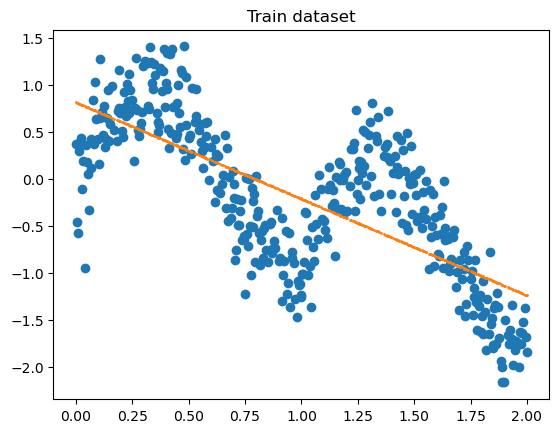

In [5]:
plt.scatter(x_train, y_train)
plt.scatter(x_train, m[0]*x_train + m[1], s=1)
plt.title("Train dataset")

Text(0.5, 1.0, 'Test dataset')

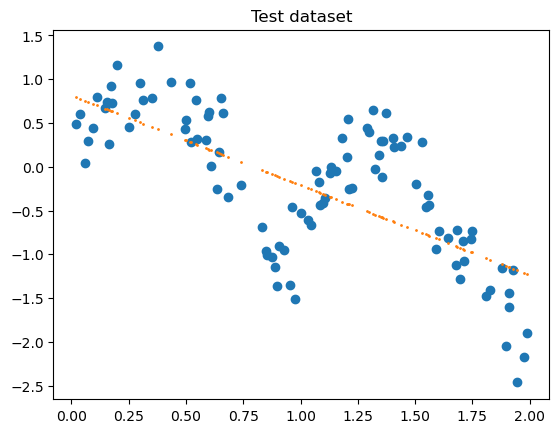

In [6]:
plt.scatter(x_test, y_test)
plt.scatter(x_test, m[0]*x_test + m[1], s=1)
plt.title("Test dataset")

### Part4:
Were the reported accuracies acceptable?

What about the line you drew in the last part?

Was it appropriate for the dataset?
<br><br/>
Explain what are the main problems here.

دقتهای به دست آمده مناسب نیستند، زیرا مقادیر خروجی بین -2 تا 1.5 هستند در حالی که خطا در حدود 0.3 به دست آمده است.همچنین با توجه به نمودارهای رسم شده، خط به دست آمده به خوبی رفتار داده را نمایش نمی دهد. بنابراین می توان گفت که رگرسیون خطی برای این داده مناسب نیست زیرا این داده دارای رفتار غیرخطی است 

### Part5:
Now, consider the `Locally Weighted Linear Regression` approach for this problem. Do expect it performs better than simple `Linear Regression` for this dataset?

از آن جایی که رفتار داده به صورت خطی نیست، استفاده از این رویکرد مناسب تر از رگرسیون خطی است.

### Part6:
Here, we want to implement the `suggested model`. You can implement any weight function you want, the below implementation is just a sample:
<br><br/>
\begin{equation*}
    w^{(i)}=exp\left(-\frac{(\mathbf x^{(i)}-\mathbf x)^\top(\mathbf x^{(i)}-\mathbf x)}{2\tau^2}\right)
\end{equation*}

In [7]:
def get_weight_matrix(the_query_point, train_dataset, hyperparameter):
    l = train_dataset.shape[0]
    W = np.mat(np.eye(l))
    for i, xi in enumerate(train_dataset):
        W[i, i] = np.exp(-1*np.dot((xi-the_query_point),(xi-the_query_point).T)/(2*hyperparameter**2))
    return W

Now implement the `closed form solution` based on the following formula:
<br><br/>
\begin{equation*}
    \boldsymbol\theta=(X^\top WX)^{-1}(X^\top WY)
\end{equation*}
<br><br/>
Of course if you use another form, implement your own.

In [8]:
def predict(train_X, train_Y, query_x, hyperparameter):
    l = train_X.shape[0]
    X = np.hstack((train_X, np.ones((l, 1))))
    qx = np.mat([query_x, 1])

    W = get_weight_matrix(qx, X, hyperparameter)

    theta = np.dot(np.dot(np.dot(np.linalg.inv(np.dot(np.dot(X.T,W),X)),X.T),W),train_Y)

    return np.dot(qx, theta)

### Part7:
Report accuracy of this model on the test dataset. Also, draw a plot that contains (x_test, y_test) pairs and (x_test, predicted_y) pairs that differ in color.

In [9]:
hyperparameter = 0.01
#x_test = x_test.to_numpy().reshape(-1,1)

predicted_test = [predict(x_train, y_train, query, hyperparameter) for query in x_test]
predicted_test = np.array(predicted_test)[:,0]
error = np.linalg.norm((y_test-predicted_test))**2/len(y_test)
print(f"MSE test error: {error}")

MSE test error: 0.09575447403694291


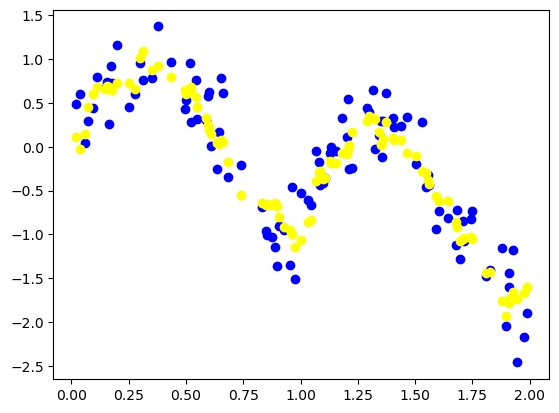

In [10]:
plt.scatter(x_test, y_test, c="blue")
plt.scatter(x_test, predicted_test, c="yellow")

### Part8:
Is the performance of the new model better than the previous one? `Explain`.

عملکرد این رویکرد بهتر از رویکرد رگرسیون خطی شد، زیرا کل داده را با یک خط تقریب نمی زند و از آن جا که داده ی موجود رفتار خطی ندارد، بنابراین خطای کمتری از خود نشان می دهد. به عبارتی دیگر در این حالت کل داده رفتار خطی ندارد ولی زیربخش های مختلف داده رفتار خطی دارند و از این رو رگرسیون خطی به صورت محلی، عملکرد بهتری دارد.

### Part9:
Now, we want to consider the `KNN` approach for this problem; Do you think it will perform well?

با توجه به این که داده رفتار غیرخطی دارد، انتظار میرود که استفاده از این روش به ازای پارامتر (کی) مناسب، عملکرد مناسب و بهتری نسبت به رگرسیون خطی از خود نشان بدهد. 

### Part10:
Implementing the `KNN model`.

In [11]:
class KNN:
    def __init__(self, number_neighbours, X, Y):
        self.k = number_neighbours
        self.X = X
        self.Y = Y

    def distance(self, x1, x2):
        distance = np.sqrt(np.abs(x1-x2)) # implement the distance function
        return distance

    def return_nn_ids(self, x):
        indices = np.argsort(np.array([self.distance(x,xt) for xt in self.X]),axis=0)[:self.k] # find indices of k nearest neighbours to x
        return indices

    def predict(self, x):
        nearest_indices = self.return_nn_ids(x)
        predicted_y = self.Y[nearest_indices].mean()
        return predicted_y 

In [12]:
def evaluation(k, x_train, y_train, x_test, y_test):
    model = KNN(k, x_train, y_train)
    predicted_y = [model.predict(x) for x in x_test]
    error = np.linalg.norm((y_test-np.array(predicted_y).reshape(-1,1)))**2/len(y_test)
    return error, predicted_y

In [13]:
k = 19
error_knn, predicted_y = evaluation(k, x_train, y_train, x_test, y_test)
print(f"MSE error of KNN for test dataset: {error_knn}")

MSE error of KNN for test dataset: 0.09687363389746839


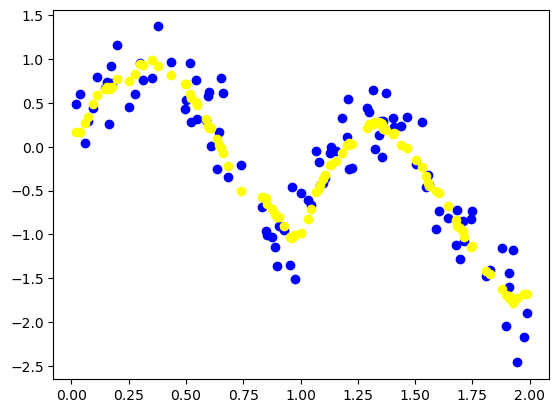

In [14]:
plt.scatter(x_test, y_test, c="blue")
plt.scatter(x_test, predicted_y, c="yellow")

To find best K for this algorithm we suggest to use cross-validation.
<br><br/>
Did this model perform well (due to the plot and test accuracy)?

با توجه به نمودار و همچنین دقت گزارش شده، این روش توانسته به طور مناسب عمل رگرسیون را انجام دهد.